# Evaluate Classification

## Setup

#### Load the API key and libaries.

In [1]:
from src.Language_Evaluation_LC import llm_language_evaluation
from src.data_analysis import run_analysis
import pandas as pd

#### Load the Constants

In [2]:
PATH = 'data/full_dataset.csv'
MODEL = "mistralai/Mixtral-8x7B-Instruct-v0.1"
TEMPERATURE = 0.0
N_REPETITIONS = 0
REASONING = False
LANGUAGES = ['spanish', 'tagalog', 'portuguese', 'english']

#### Run The Experiments:

In [3]:
# Run evaluation:
llm_language_evaluation(path=PATH, model=MODEL, temperature=TEMPERATURE, n_repetitions=N_REPETITIONS, reasoning=REASONING, languages=LANGUAGES)

N_REPETITIONS should be a positive integer, not 0
N_REPETITIONS will be set to 1
**************************************************
Question 1: 
Language: spanish
Question: 
¿En qué región ocular se encuentran fisiológicamente las células caliciformes?
a) córnea.
b) Limbus corneoscleral.
c) Línea gris.
d) Pliegue semilunar.
Test #0: 
response
 ```json
{
	"response": "b"
}
```
{'response': 'b'}
Language: tagalog
Question: 
Aling bahagi ng mata ay kung saan matatagpuan ang mga caliciform cells?
a) Cornea.
b) Corneoscleral limbus.
c) Grey line.
d) Semilunar fold.
Test #0: 
response
 ```json
{
	"response": "b"
}
```
{'response': 'b'}
Language: portuguese
Question: 
Em qual região ocular células caliciformes são fisiologicamente encontradas?
a)Córnea.
b)Limbo corneoescleral.
c)Linha cinzenta.
d)Prega semilunar.
Test #0: 
response
 ```json
{
	"response": "b"
}
```
{'response': 'b'}
Language: english
Question: 
In which ocular region are caliciform cells physiologically found?
a) Cornea.
b) C

#### See the results

In [4]:
import os
MODEL = os.path.basename(MODEL)

if N_REPETITIONS > 1:
    df = pd.read_csv(f"responses/{MODEL}_Temperature{str(TEMPERATURE).replace('.', '_')}_{N_REPETITIONS}Repetitions.csv")
else:
    df = pd.read_csv(f"responses/{MODEL}_Temperature{str(TEMPERATURE).replace('.', '_')}.csv")

df

,ID,year,test,theme,subtheme,portuguese,spanish,english,tagalog,answer,responses_spanish,responses_spanish_0,responses_tagalog,responses_tagalog_0,responses_portuguese,responses_portuguese_0,responses_english,responses_english_0
0,1,2022,Teórica I,Anatomia,cornea,Em qual região ocular células caliciformes são...,¿En qué región ocular se encuentran fisiológic...,In which ocular region are caliciform cells ph...,Aling bahagi ng mata ay kung saan matatagpuan ...,D,b,b,b,b,b,b,C,C
1,2,2022,Teórica I,Anatomia,retina,Assinale a alternativa que melhor correlaciona...,Marque la alternativa que mejor correlaciona l...,Mark the alternative that best correlates the ...,Ipagpares ang bahagi ng retina sa Hanay B sa t...,B,a,a,a,a,a,a,c,c
2,3,2022,Teórica I,Anatomia,cornea,Ordene as três denominações celulares encontra...,Ordene los tres nombres de células que se encu...,Order the three cell names found in the cornea...,Ipagsunud-sunod ang mga cells ng corneal epith...,A,A,A,A,A,A,A,A,A
3,4,2022,Teórica I,Anatomia,cornea,"Sobre a membrana de Descemet da córnea, é corr...",Con respecto a la membrana de la córnea de Des...,"Regarding Descemet's membrane of the cornea, i...",Tama tungkol sa Descemet's membrane ng cornea:...,C,B,B,d,d,C,C,C,C
4,5,2022,Teórica I,Anatomia,cornea,"Sobre a camada lipídica do filme lacrimal, ass...",Respecto a la capa lipídica de la película lag...,"About the lipidic layer of the lacrimal film, ...",Piliin ang tamang sagot tungkol sa lipid layer...,B,d,d,a,a,c,c,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,161,2022,Teórica II,Cristalino/Catarata,NaN,Após bloqueio retrobulbar para realização de c...,Tras el bloqueo retrobulbar para realizar la c...,After retrobulbar block for phacoemulsificatio...,Matapos ang retrobulbar block para sa phacoemu...,C,b,b,d,d,D,D,b,b
160,162,2022,Teórica II,Cristalino/Catarata,NaN,Sobre a biometria em olhos tamponados por óleo...,Respecto a la biometría en ojos tamponados con...,Regarding biometrics in eyes covered with sili...,Alin sa mga sumusunod na pahayag patungkol sa ...,D,a,a,a,a,A,A,A,A
161,163,2022,Teórica II,Cristalino/Catarata,NaN,"Assinale a alternativa que contém, respectivam...","Seleccionar la alternativa que contenga, respe...","Check the alternative that contains, respectiv...",Alin sa mga sumusunod na tambalan patungkol sa...,A,a,a,D,D,A,A,a,a
162,164,2022,Teórica II,Cristalino/Catarata,NaN,Sobre a prevenção de endoftalmite em cirurgia ...,En cuanto a la prevención de endoftalmitis en ...,Regarding the prevention of endophthalmitis in...,Alin sa mga sumusunod na pamamaraan upang mapi...,B,b,b,b,b,b,b,b,b


### Data Analysis

n_repetitions should be a positive integer, not 0
n_repetitions will be set to 1


/Users/davidrestrepo/LLMs Bias/Language/src/data_analysis.py:215: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(languages, fontsize=16)


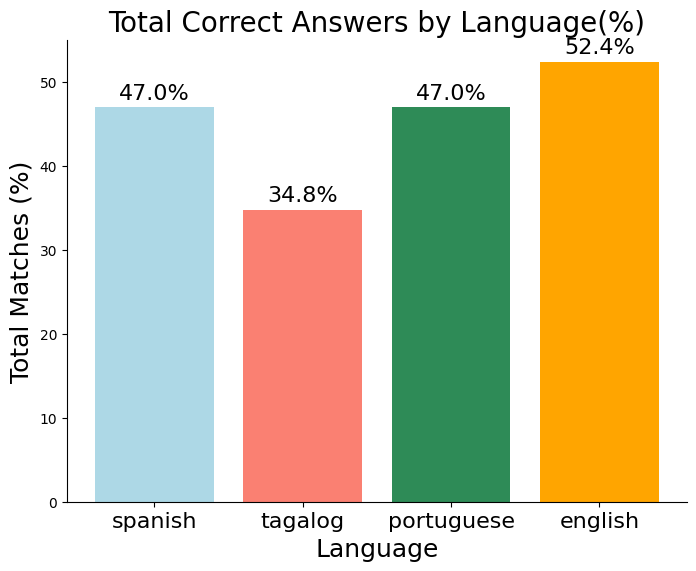

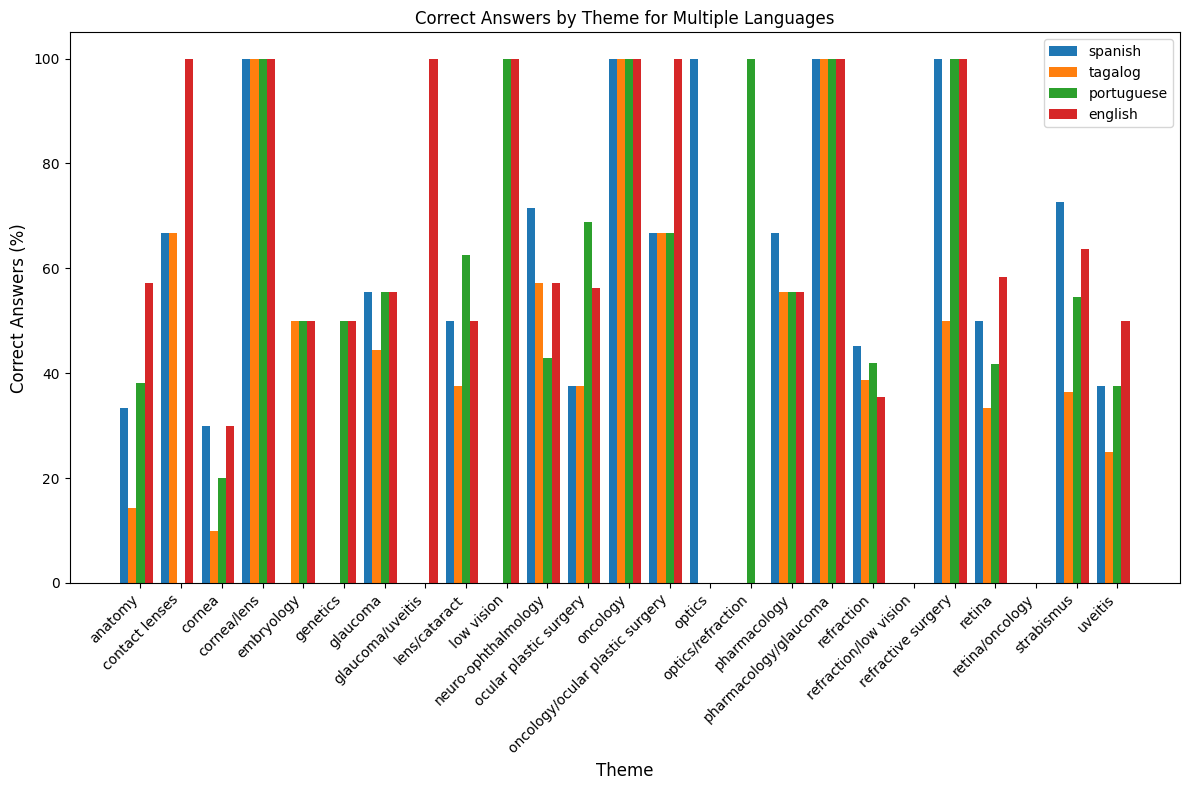

     theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  anatomy              7              3                 8             12   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     21                 33.333333                 14.285714   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    38.095238                 57.142857  


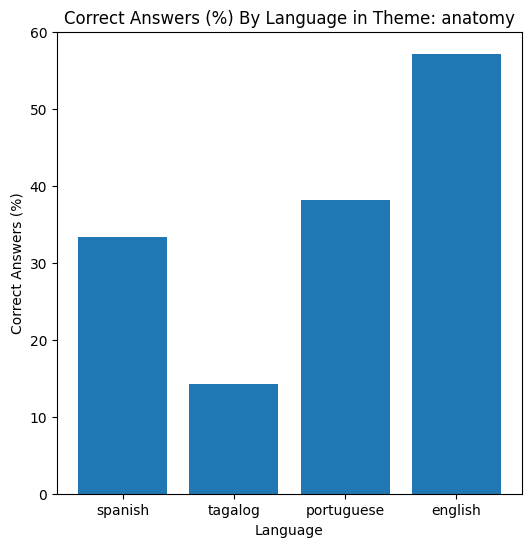

    theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  cornea              3              1                 2              3   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     10                      30.0                      10.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                         20.0                      30.0  


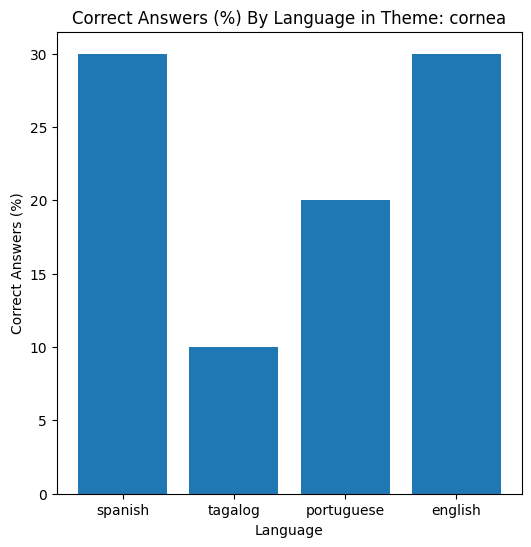

        theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  embryology              0              1                 1              1   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      2                       0.0                      50.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                         50.0                      50.0  


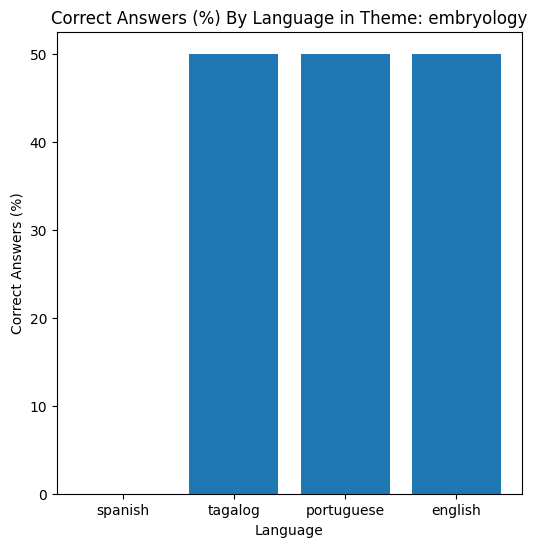

      theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  genetics              0              0                 1              1   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      2                       0.0                       0.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                         50.0                      50.0  


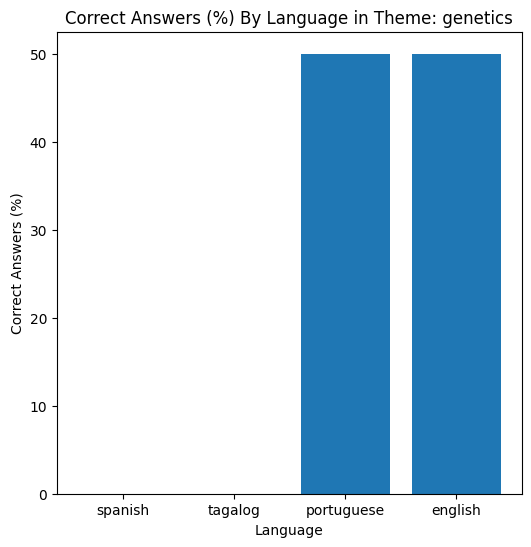

      theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  glaucoma              5              4                 5              5   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      9                 55.555556                 44.444444   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    55.555556                 55.555556  


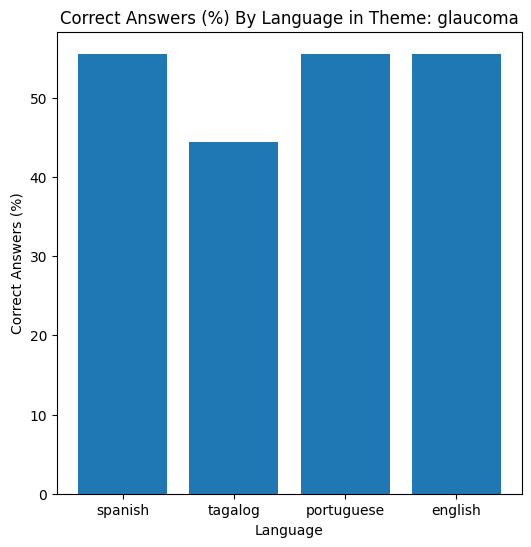

      theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  oncology              1              1                 1              1   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      1                     100.0                     100.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                        100.0                     100.0  


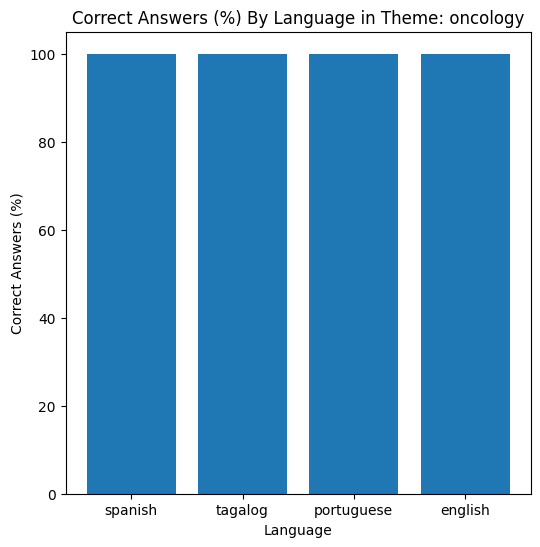

          theme  match_spanish  match_tagalog  match_portuguese  \
0  pharmacology              6              5                 5   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              5      9                 66.666667                 55.555556   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    55.555556                 55.555556  


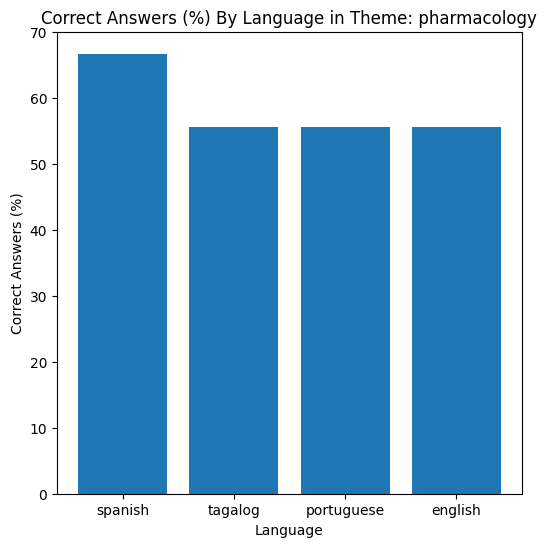

        theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  refraction             14             12                13             11   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     31                  45.16129                 38.709677   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    41.935484                 35.483871  


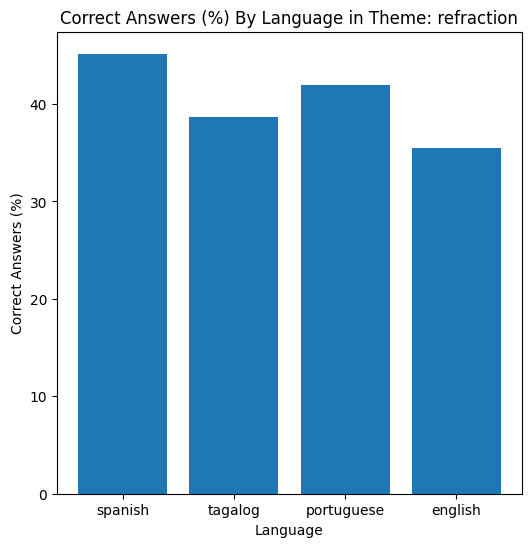

    theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  retina              6              4                 5              7   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     12                      50.0                 33.333333   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    41.666667                 58.333333  


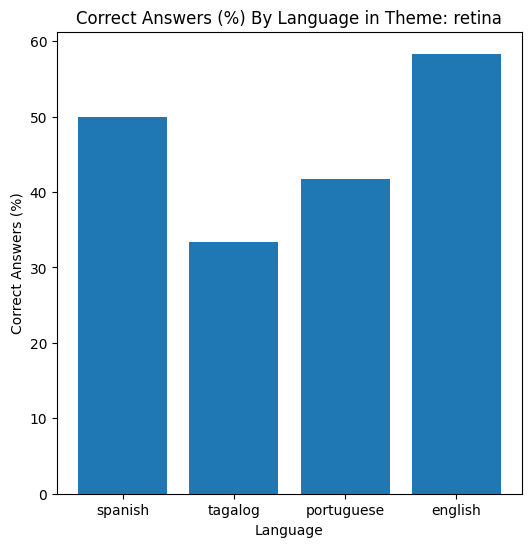

            theme  match_spanish  match_tagalog  match_portuguese  \
0  contact lenses              2              2                 0   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              3      3                 66.666667                 66.666667   

   portuguese_ratio_percentage  english_ratio_percentage  
0                          0.0                     100.0  


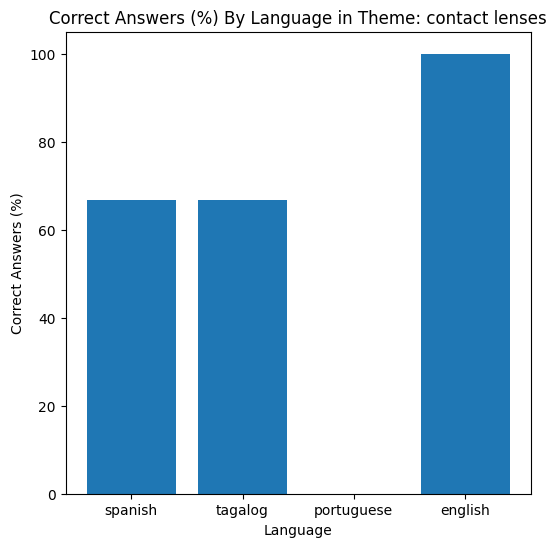

    theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  cornea              3              1                 2              3   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     10                      30.0                      10.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                         20.0                      30.0  


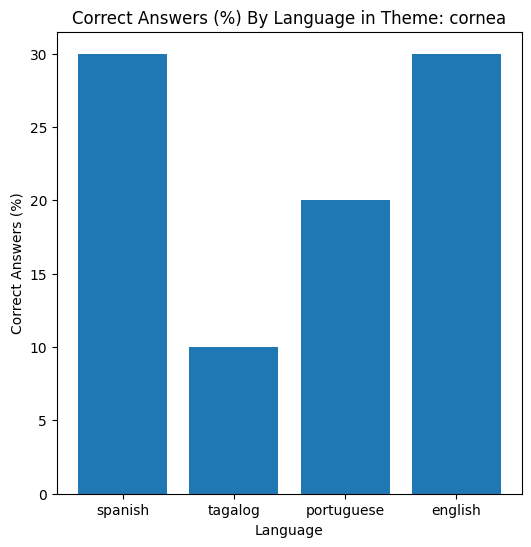

         theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  cornea/lens              1              1                 1              1   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      1                     100.0                     100.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                        100.0                     100.0  


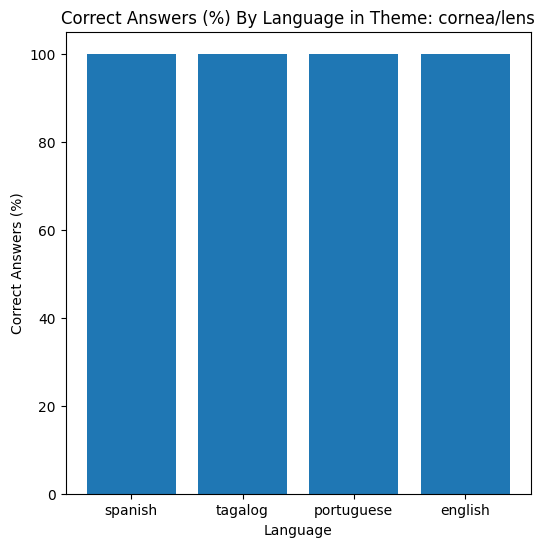

      theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  glaucoma              5              4                 5              5   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      9                 55.555556                 44.444444   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    55.555556                 55.555556  


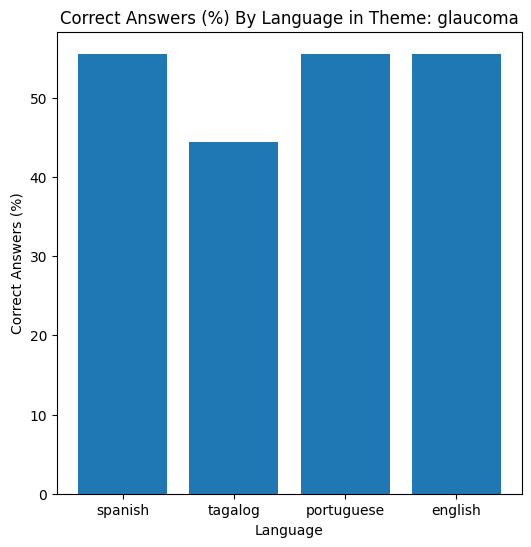

              theme  match_spanish  match_tagalog  match_portuguese  \
0  glaucoma/uveitis              0              0                 0   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              1      1                       0.0                       0.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                          0.0                     100.0  


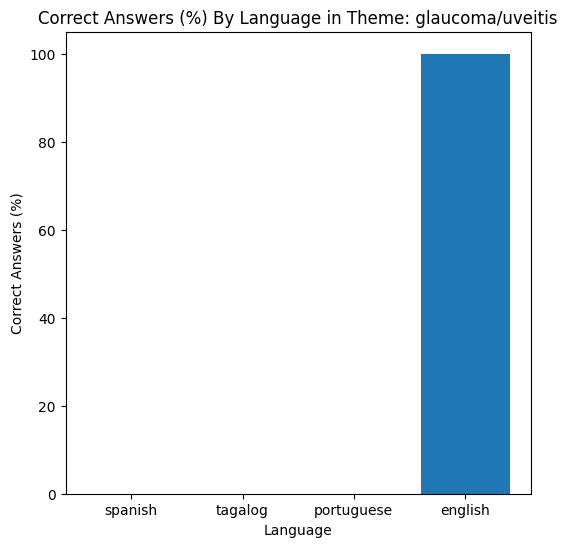

           theme  match_spanish  match_tagalog  match_portuguese  \
0  lens/cataract              4              3                 5   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              4      8                      50.0                      37.5   

   portuguese_ratio_percentage  english_ratio_percentage  
0                         62.5                      50.0  


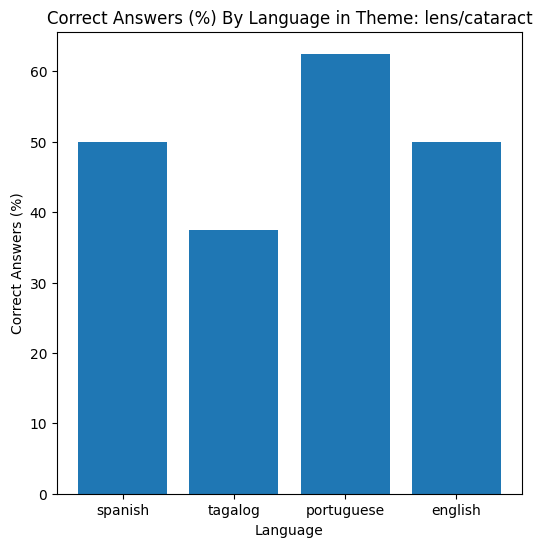

        theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  low vision              0              0                 1              1   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      1                       0.0                       0.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                        100.0                     100.0  


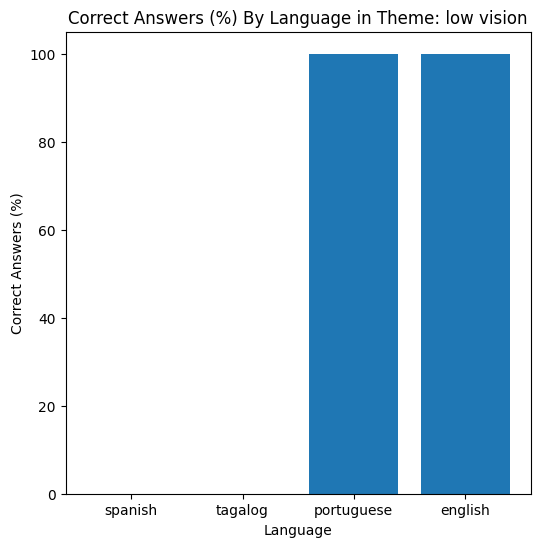

                 theme  match_spanish  match_tagalog  match_portuguese  \
0  neuro-ophthalmology              5              4                 3   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              4      7                 71.428571                 57.142857   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    42.857143                 57.142857  


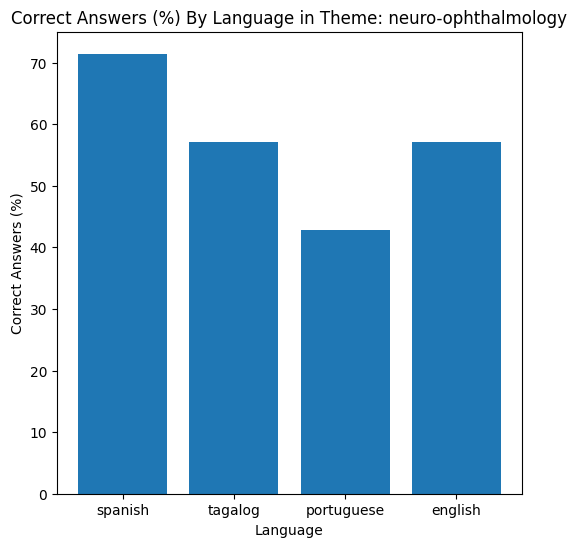

                    theme  match_spanish  match_tagalog  match_portuguese  \
0  ocular plastic surgery              6              6                11   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              9     16                      37.5                      37.5   

   portuguese_ratio_percentage  english_ratio_percentage  
0                        68.75                     56.25  


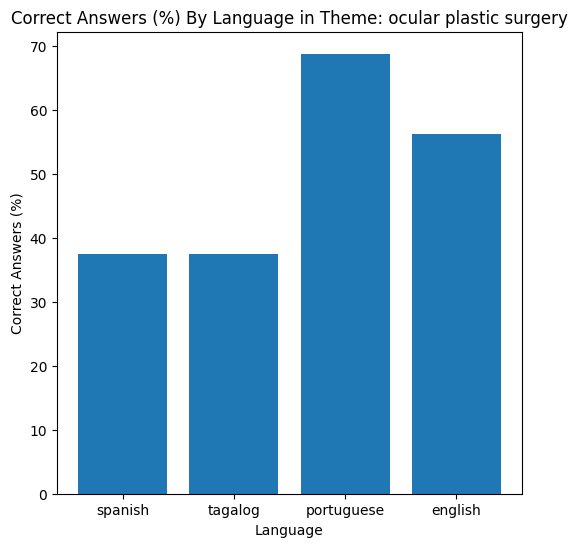

                             theme  match_spanish  match_tagalog  \
0  oncology/ocular plastic surgery              2              2   

   match_portuguese  match_english  Total  spanish_ratio_percentage  \
0                 2              3      3                 66.666667   

   tagalog_ratio_percentage  portuguese_ratio_percentage  \
0                 66.666667                    66.666667   

   english_ratio_percentage  
0                     100.0  


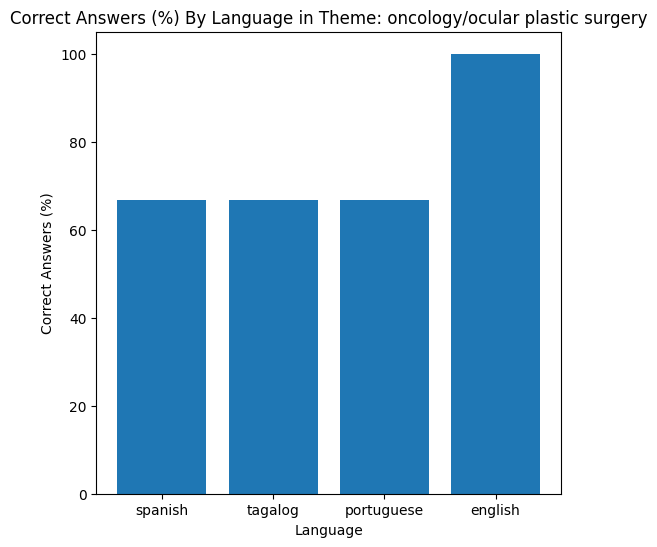

    theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  optics              1              0                 0              0   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      1                     100.0                       0.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                          0.0                       0.0  


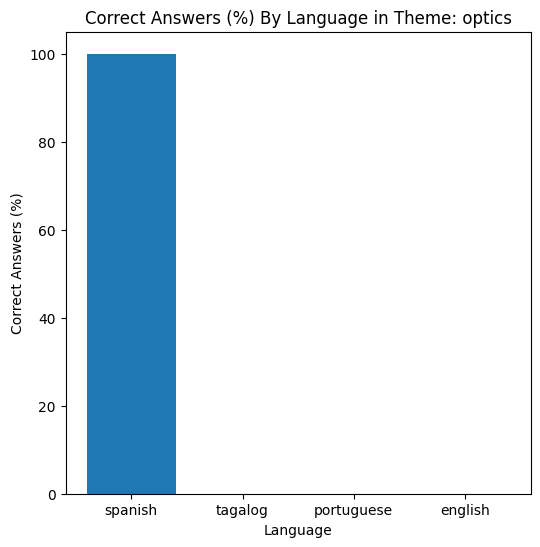

               theme  match_spanish  match_tagalog  match_portuguese  \
0  optics/refraction              0              0                 1   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              0      1                       0.0                       0.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                        100.0                       0.0  


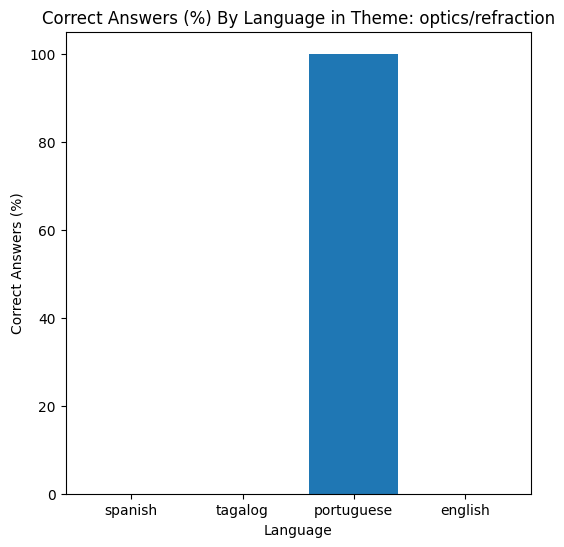

          theme  match_spanish  match_tagalog  match_portuguese  \
0  pharmacology              6              5                 5   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              5      9                 66.666667                 55.555556   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    55.555556                 55.555556  


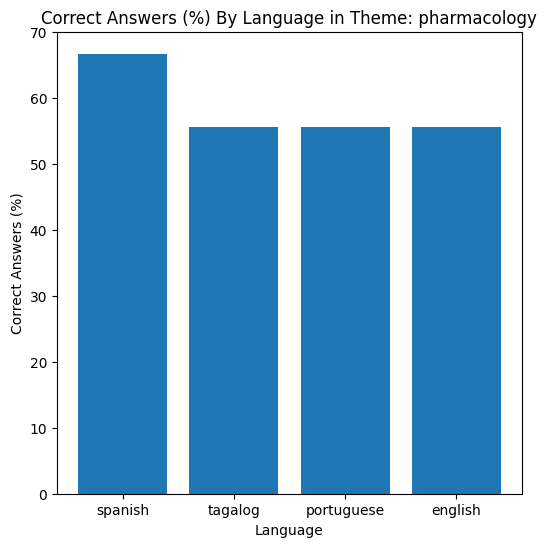

                   theme  match_spanish  match_tagalog  match_portuguese  \
0  pharmacology/glaucoma              1              1                 1   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              1      1                     100.0                     100.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                        100.0                     100.0  


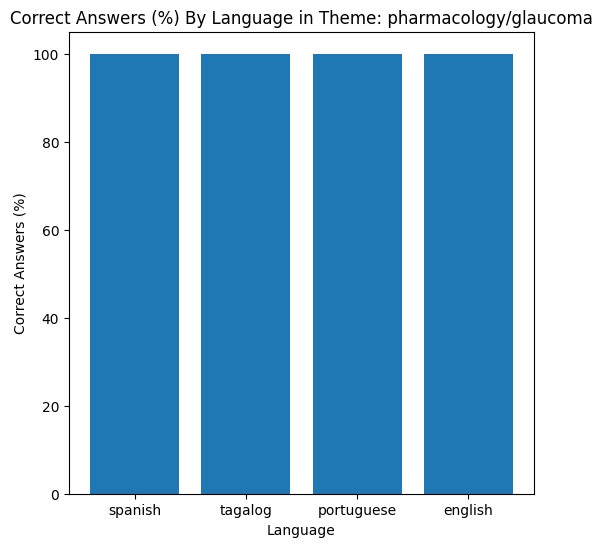

        theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  refraction             14             12                13             11   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     31                  45.16129                 38.709677   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    41.935484                 35.483871  


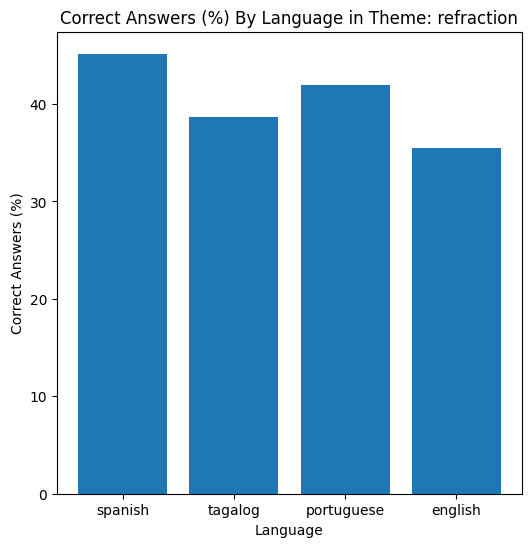

                   theme  match_spanish  match_tagalog  match_portuguese  \
0  refraction/low vision              0              0                 0   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              0      2                       0.0                       0.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                          0.0                       0.0  


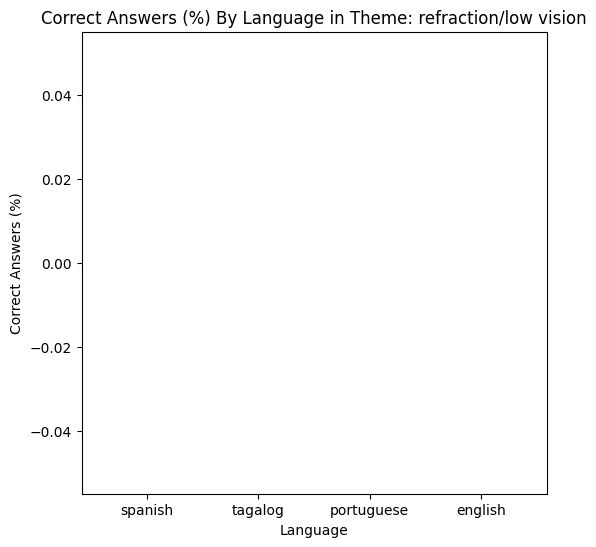

                theme  match_spanish  match_tagalog  match_portuguese  \
0  refractive surgery              2              1                 2   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              2      2                     100.0                      50.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                        100.0                     100.0  


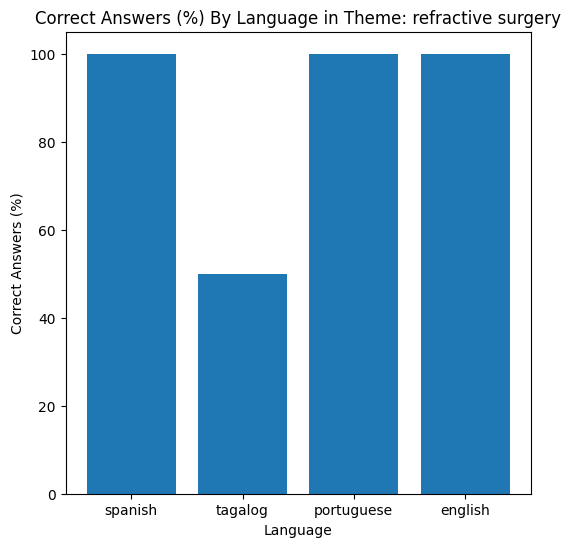

    theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  retina              6              4                 5              7   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     12                      50.0                 33.333333   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    41.666667                 58.333333  


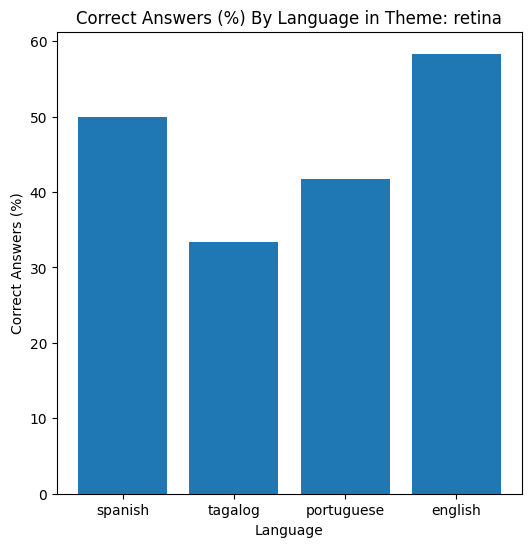

             theme  match_spanish  match_tagalog  match_portuguese  \
0  retina/oncology              0              0                 0   

   match_english  Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0              0      1                       0.0                       0.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                          0.0                       0.0  


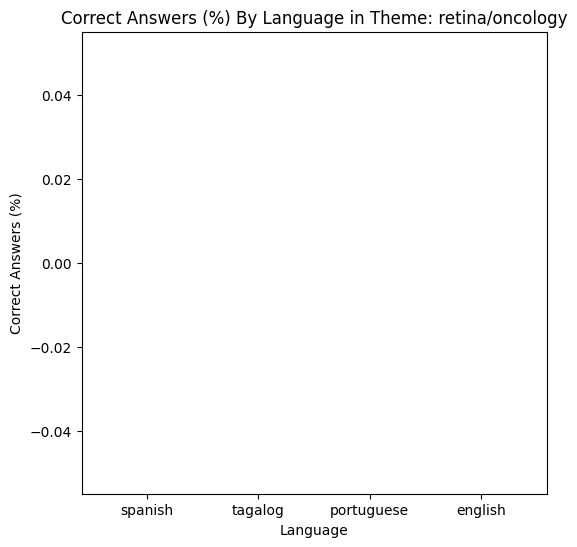

        theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  strabismus              8              4                 6              7   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0     11                 72.727273                 36.363636   

   portuguese_ratio_percentage  english_ratio_percentage  
0                    54.545455                 63.636364  


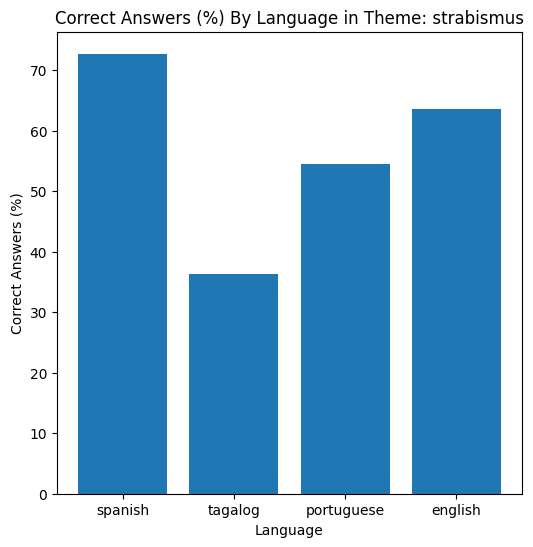

     theme  match_spanish  match_tagalog  match_portuguese  match_english  \
0  uveitis              3              2                 3              4   

   Total  spanish_ratio_percentage  tagalog_ratio_percentage  \
0      8                      37.5                      25.0   

   portuguese_ratio_percentage  english_ratio_percentage  
0                         37.5                      50.0  


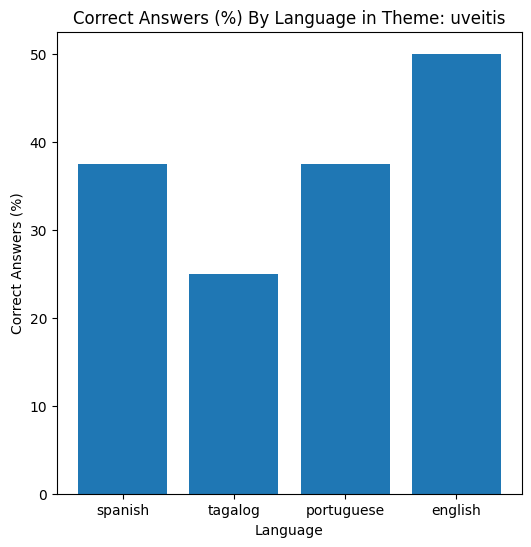

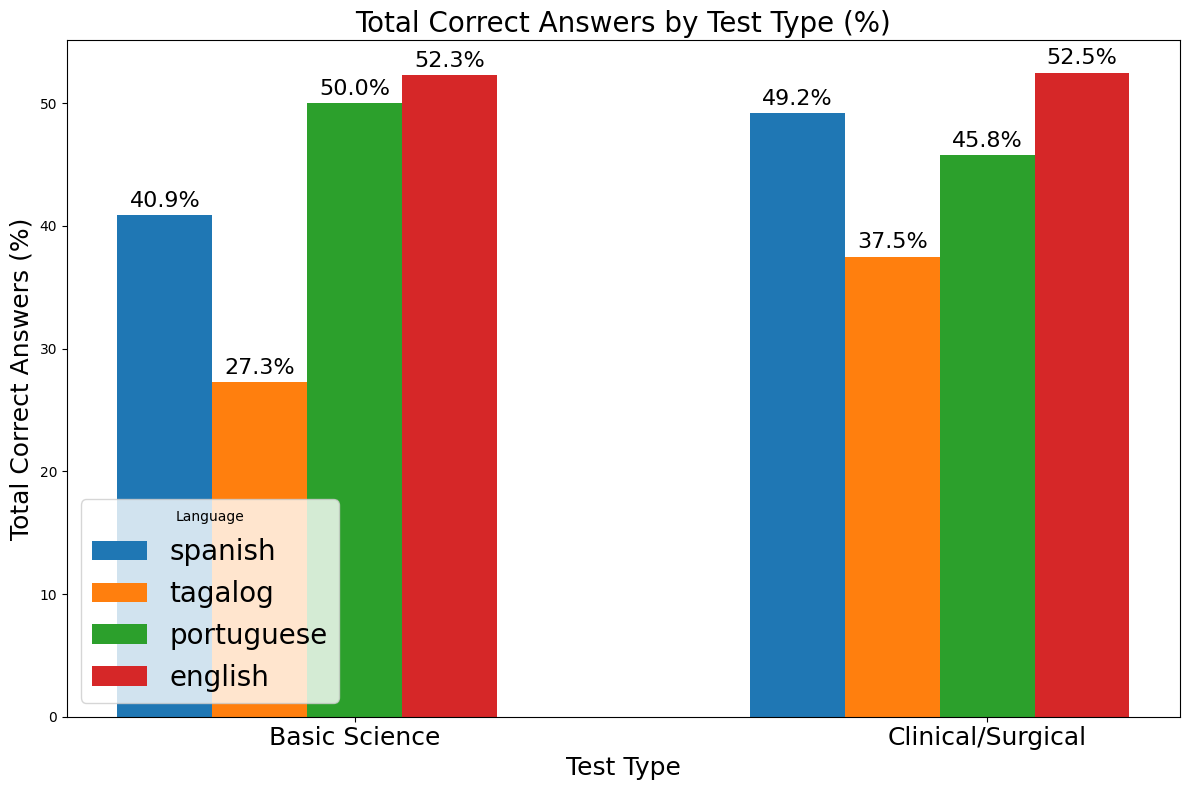

In [5]:
TEMPERATURE = str(TEMPERATURE).replace('.', '_')

run_analysis(model=MODEL, temperature=TEMPERATURE, n_repetitions=N_REPETITIONS, languages=LANGUAGES)

In [6]:
N_REPETITIONS = 1 if N_REPETITIONS < 1 else N_REPETITIONS
pd.read_csv(f'results/results_{MODEL}_Temperature{TEMPERATURE}_Repetitions{N_REPETITIONS}/matches_results_{MODEL}.csv')

,test,year,theme,match_spanish,match_tagalog,match_portuguese,match_english,Total
0,Teórica I,2022,anatomy,7,3,8,12,21
1,Teórica I,2022,cornea,0,0,0,1,1
2,Teórica I,2022,embryology,0,1,1,1,2
3,Teórica I,2022,genetics,0,0,1,1,2
4,Teórica I,2022,glaucoma,1,1,1,1,1
5,Teórica I,2022,oncology,1,1,1,1,1
6,Teórica I,2022,pharmacology,3,2,3,2,3
7,Teórica I,2022,refraction,5,4,6,3,12
8,Teórica I,2022,retina,1,0,1,1,1
9,Teórica II,2022,contact lenses,2,2,0,3,3


In [7]:
pd.read_csv(f'results/results_{MODEL}_Temperature{TEMPERATURE}_Repetitions{N_REPETITIONS}/matches_results_{MODEL}.csv').sum()

test                Teórica ITeórica ITeórica ITeórica ITeórica IT...
year                                                            60660
theme               anatomycorneaembryologygeneticsglaucomaoncolog...
match_spanish                                                      77
match_tagalog                                                      57
match_portuguese                                                   77
match_english                                                      86
Total                                                             164
dtype: object